## 3-Sigma Technique (Standar Deviasion)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pandas as pd

In [3]:
data = pd.read_csv('./dataset/raw_sales.csv')
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [4]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [5]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [8]:
list_1 = find_anomalies(data['price'])
print(len(list_1),len(data),data.price.skew())

461 29580 4.312009366902366


Menggunakan metode skew() pada kolom 'price' dalam DataFrame 'data' untuk mengukur kemiringan distribusi data. Skewness mengukur seberapa asimetris distribusi data. Jika skewness positif, maka distribusi condong ke kanan; jika negatif, distribusi condong ke kiri.

- Jika skewness > 0: Distribusi condong ke kanan (ekor panjang ke arah nilai yang lebih tinggi).
- Jika skewness < 0: Distribusi condong ke kiri (ekor panjang ke arah nilai yang lebih rendah).
- Jika skewness = 0: Distribusi simetris.

<Axes: xlabel='price', ylabel='Density'>

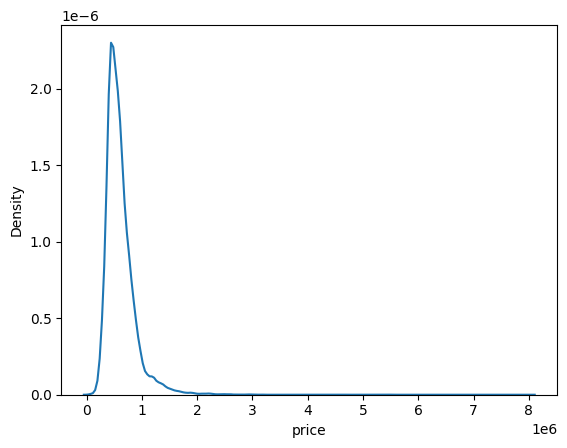

In [9]:
sns.kdeplot(data.price)

## Transformasi Data

In [11]:
import numpy as np

In [16]:
data['price_transformed'] = np.log(data.price)
list_2 = find_anomalies(data.price_transformed)
print(len(list_2),len(data),data.price_transformed.skew())

266 29580 0.4731646269984763


<Axes: xlabel='price_transformed', ylabel='Density'>

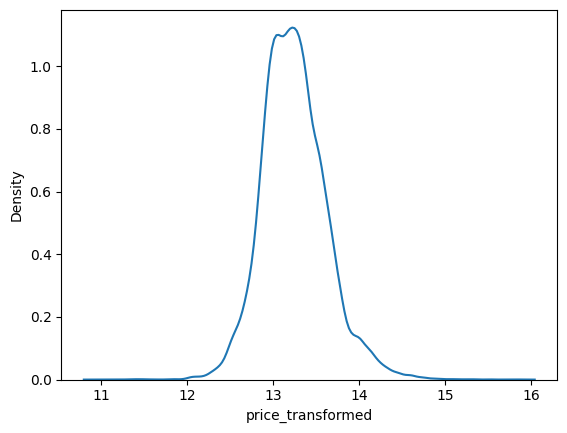

In [17]:
sns.kdeplot(data.price_transformed)

## Boxplots

<Axes: >

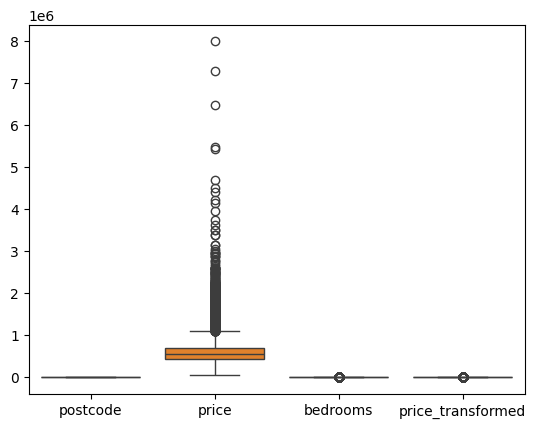

In [18]:
sns.boxplot(data=data)